In [9]:
# from utils.json2numpy import json2numpy
# json2numpy("dataset/train.json", "dataset/train/imgs", "dataset/train/masks")
# json2numpy("dataset/test.json", "dataset/test/imgs", "dataset/test/masks")

In [10]:
import cv2
import glob
import numpy as np
import os.path as osp
import matplotlib.pyplot as plt
from utils.compute_iou import compute_ious
from main import segment_fish

In [11]:
data_root = osp.join("dataset", "train", "imgs")
img_paths = glob.glob(osp.join(data_root, "*.jpg"))
len(img_paths)

5

(436, 640) 0.5836804215624959


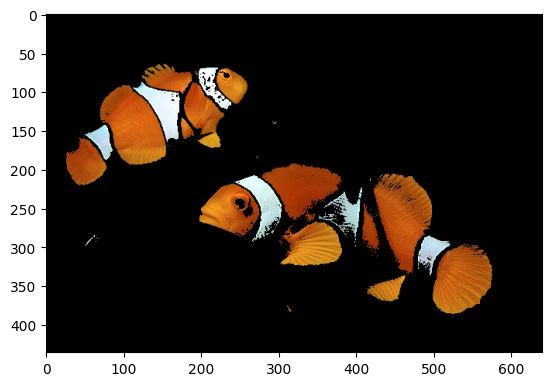

(450, 600) 0.6173842058587218


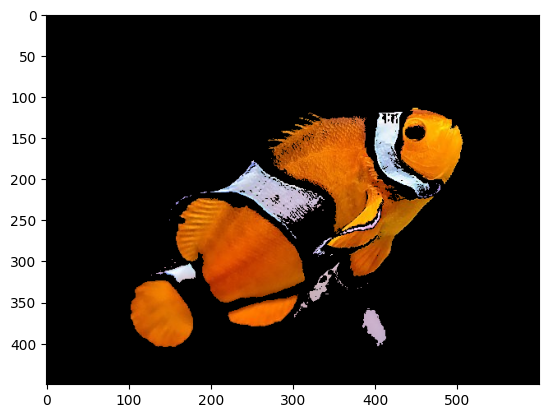

(600, 600) 0.6692304717454202


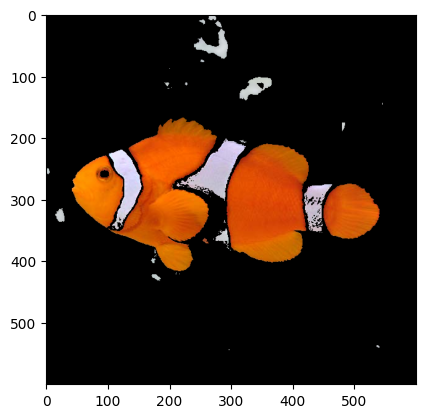

(845, 1200) 0.679695473484021


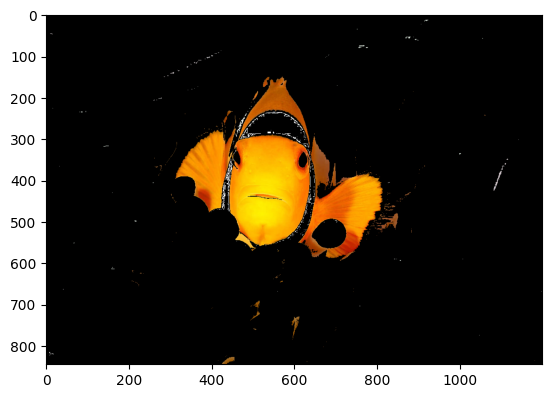

(793, 1200) 0.6492991707477586


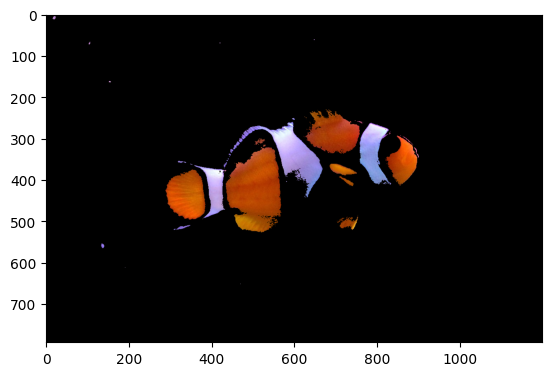

In [12]:
masks = dict()
for path in img_paths:
    img = cv2.imread(path)
    mask = segment_fish(img)
    masks[osp.basename(path)] = mask
    print(mask.shape, compute_ious(masks, osp.join("dataset", "train", "masks")))
    img = np.where(mask[:,:,None], img, np.zeros_like(img))
    plt.imshow(img[:,:,::-1])
    plt.show()